Pada studi ini kita akan menganalisa distribusi probabilitas dari *return*. Orang sering menggunakan distribusi normal (Gaussian) untuk menganalisa *return*, padahal distribusi dari *return* biasanya bukan distribusi normal. Kesalahan ini dapat berakibat fatal pada hasil analisisnya.

## Data

Untuk data, kita akan memuat data *return* bulanan selama periode 1926 - 2018 dari saham *smallcaps* dan *largecaps* di bursa Amerika. Saham *small caps* dan *large caps* didefinisikan sebagai saham di *quantile* 10% bawah dan atas.

Kita memuat datanya sebagai berikut.

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, HTML

%matplotlib inline
FIGSIZE=(8,4)

returns = pd.read_csv('SmallLargeCapReturns.csv', index_col='date', parse_dates=True)
returns.index = returns.index.to_period('M')
returns.head()

,SmallCap,LargeCap
date,,
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


## Distribusi Normal

Sekarang mari kita mensintesis data *return* bulanan dengan distribusi Normal, dengan menggunakan ***mean*** dan *standard deviation* (***std***) dari data *return* dari saham *SmallCap*.

Kita hitung *mean* dan *standard deviasi*-nya sebagai berikut:

In [32]:
N = len(returns)
mean = returns['SmallCap'].mean()
std = returns['SmallCap'].std()
print('N: {}, mean: {}, std: {}'.format(N, mean, std))

N: 1110, mean: 0.017597567567567567, std: 0.10628817804909388


Setelah itu kita bisa mensintesis data buatan dengan distribusi Normal dengan kedua parameter di atas, lalu kita simpan sebagai Pandas Series agar mudah di-*plot*, sebagai berikut. 

In [51]:
np.random.seed(11)
norm_returns = pd.Series(np.random.normal(mean, std, N))

Kita bisa verifikasi *mean* dan standard deviasinya sesuai (catatan: ketidaksesuaian *mean* dan *std* dari random samples ini biasanya disebabkan karena jumlah samples yang kita sintesis tidak banyak. Semakin besar N, maka *mean* dan *std* akan semakin mendekati parameternya):

In [53]:
print('Mean: {}, std: {}'.format(norm_returns.mean(), norm_returns.std()))

Mean: 0.017987121144709076, std: 0.10673074427400601


Cukup dekat.

Selanjutnya kita akan gambarkan *return* bulanan yang kita sintesa di atas. Dalam grafik di bawah, kita gambarkan juga garis oranye yang mencerminkan standard deviasi +3 dan -3, yang mencerminkan 0.9973 dan 0.0027 *quantile* dari data kita. Artinya, hanya ada kemungkinan 0.54% (=0.0027\*2) bahwa *sample*-nya di atas atau di bawah garis ini. Dalam konteks *return* bulanan, kejadian ini hanya akan terjadi setiap 15 tahun (=1/0.0054).

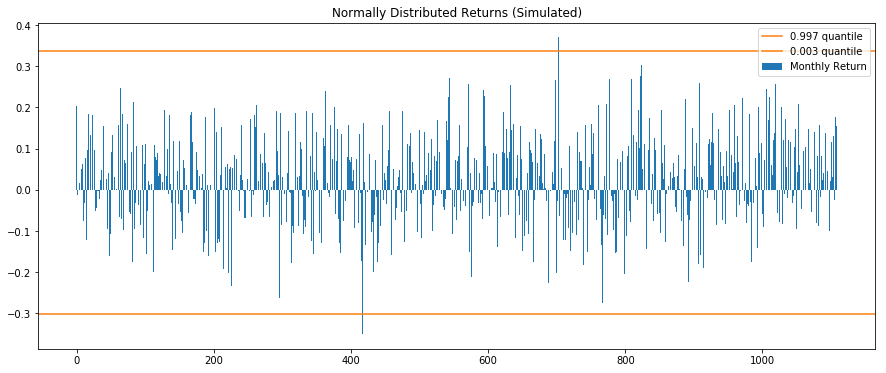

In [54]:
fig, ax = plt.subplots(figsize=(15,6))
x = range(N)
ax.bar(x, norm_returns, label='Monthly Return')
ax.axhline(mean + 3 * std, color='C1', label='0.997 quantile')
ax.axhline(mean - 3 * std, color='C1', label='0.003 quantile')
ax.set_title('Normally Distributed Returns (Simulated)')
ax.legend()

Terlihat di atas bahwa return bulanan berapa di luar batas +/- 3 SD hanya dua kali.

Kalau kita *plot* distribusinya sebagai histogram:

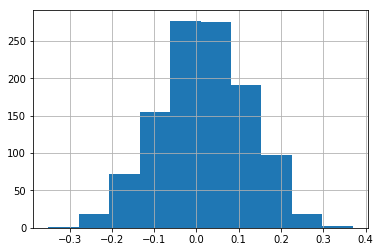

In [55]:
norm_returns.hist()

Maka tampak histogram yang bentuknya mirip dengan distribusi normal. Kalaupun ada perbedaan, ini dikarenakan jumlah sampel yang kita sintesis tidak cukup banyak.

## Distribusi dari Return Aktual

Dengan mekanisme yang sama, mari kita gambarkan *return* yang sebenarnya dari aset *SmallCap*.

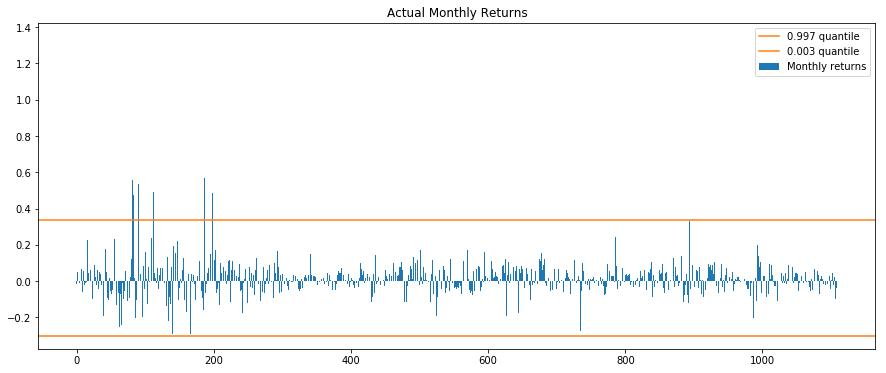

In [40]:
fig, ax = plt.subplots(figsize=(15,6))
x = range(len(returns))
ax.bar(x, returns['SmallCap'], label='Monthly returns')
ax.axhline(mean + 3 * std, color='C1', label='0.997 quantile')
ax.axhline(mean - 3 * std, color='C1', label='0.003 quantile')
ax.set_title('Actual Monthly Returns')
ax.legend()

Terlihat bahwa *return* yang aktual lebih banyak melampaui batas +/- 3 SD. Kita bisa menghitung berapa kali dia melampai batas dengan kode berikut.

In [45]:
plus3sd = returns['SmallCap'].mean() + 3 * returns['SmallCap'].std()
minus3sd = returns['SmallCap'].mean() - 3 * returns['SmallCap'].std()
print('+3 SD: {}, -3 SD: {}'.format(plus3sd, minus3sd))

outside = returns[(returns['SmallCap'] > plus3sd) | (returns['SmallCap'] < minus3sd)]
outside['SmallCap']

+3 SD: 0.33646210171484925, -3 SD: -0.3012669665797141


date
1932-07    0.4819
1932-08    1.3429
1933-04    0.5569
1933-05    1.0981
1933-06    0.4769
1934-01    0.5368
1935-11    0.4926
1936-01    0.4636
1939-09    1.1188
1942-01    0.5684
1943-01    0.4869
1943-02    0.4657
Freq: M, Name: SmallCap, dtype: float64

Kita juga bisa *plot* distribusinya sebagai histogram:

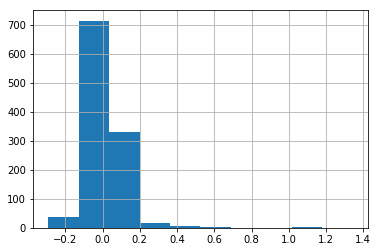

In [49]:
returns['SmallCap'].hist()

Histogram di atas bukanlah distribusi Normal, karena tidak simetris dan juga mempunyai ekor yang panjang (*fat tail*). Kedua karakteristik ini disebut *skewness* dan *kurtosis*.

## Skewness dan Kurtosis

Dari studi di atas, tampaknya kita harus mempelajari lebih jauh dari sekedar melihat *mean* dan variance. Kita harus melihat *higher order moments*, dalam hal ini terutama adalah *skewness* dan *kurtosis*.

***Skewness*** adalah ukuran dari simetri sebuah distribusi. Kita tahu bahwa distribusi normal adalah simetris; probabilitas untuk mendapatkan suatu nilai di atas dan di bawah *mean* (misalnya +1% dan -1% di atas/bawah *mean*) adalah sama. Jika distribusinya mempunyai *skew* yang negatif, artinya kemungkinan untuk mendapatkan sampel di bawah *mean* lebih besar dari pada kemungkinan mendapatkan sampel di atas *mean*. Distribusi Normal mempunyai nilai *skewness* nol.

***Kurtosis*** adalah ukulan ketebalan dari ekor distribusi. Kita tahu bahwa distribusi Normal mempunyai ekor yang sangat tipis. Distribusi probabilitasnya turun secara drastis menuju nol. Distribusi Normal mempunyai nilai kurtosis tiga. Nilai kurtosis lebih besar dari tiga berarti distribusi tersebut mempunyai ekor yang tebal (*fat tail*).

***Excess kurtosis*** adalah nilai kurtosis sebuah distribusi dikurangi tiga. Untuk distribusi normal, *excess kurtosis* bernilai nol.

### Menghitung Skewness dan Kurtosis dengan Python

Di Python sudah tersedia fungsi untuk menghitung *skewness* dan *excess kurtosis*.

Mari kita gunakan pertama untuk data buatan yang seharusnya berdistribusi Normal.

In [56]:
from scipy.stats import kurtosis, skew

sk = skew(norm_returns)
kr = kurtosis(norm_returns)
print('Skewness: {}, excess kurtosis: {}'.format(sk, kr))

Skewness: -0.0724528633004505, excess kurtosis: -0.1457844461820641


Seharusnya kedua nilai di atas adalah nol, tapi sekali lagi hal ini disebabkan karena jumlah sampel kita cukup sedikit.

Sekarang mari kita hitung untuk *return* dari *SmallCap*.

In [57]:
sk = skew(returns['SmallCap'])
kr = kurtosis(returns['SmallCap'])
print('Skewness: {}, excess kurtosis: {}'.format(sk, kr))

Skewness: 4.410738610114986, excess kurtosis: 43.84500784472658


Seperti terlihat, angka-angkanya jauh menyimpang dari nol, sehingga dapat disimpulkan distribusinya bukan Normal.

### Tes Normalitas dengan Jargue Bera

Tes [Jargue Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test) dapat digunakan untuk mentes apakah suatu sampel data mempunyai *skewness* dan kurtosis yang cocok dengan distribusi Normal.

Tes ini juga sudah diimplementasikan di Python. Catatan: Jargue-Bera test membutuhkan data paling tidak 2000 sampel, sedangkan data kita hanya 1100, jadi hasilnya mungkin tidak sepenuhnya benar.

In [86]:
from scipy.stats import jarque_bera

_, pval = jarque_bera(norm_returns)
print('Distribusinya {} (pval: {:.2f})'.format('normal' if pval >= 0.05 else 'bukan normal', pval))

_, pval = jarque_bera(returns['SmallCap'])
print('Distribusinya {} (pval: {:.2f})'.format('normal' if pval >= 0.05 else 'bukan normal', pval))

Distribusinya normal (pval: 0.38)
Distribusinya bukan normal (pval: 0.00)


## Referensi dan Atribusi

Sebagian besar materi di sini diambil dari materi minggu 1 dari MOOC [Introduction to Portfolio Construction and Analysis with Python](https://www.coursera.org/learn/introduction-portfolio-construction-python).